In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pwd

'/Users/leayamashiro/noise_043024'

In [4]:
noise1_on = np.load('spec_noise_on.npz')['data0']
noise1_off = np.load('spec_noise_off.npz')['data0']

In [6]:
noise1_on = np.fft.fftshift(noise1_on)
noise1_off = np.fft.fftshift(noise1_off)

(1020.0, 1500.0)

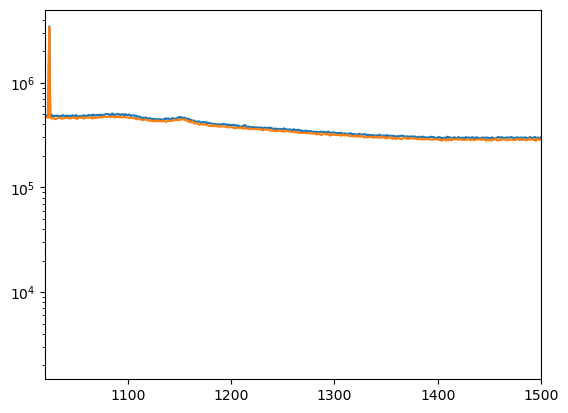

In [8]:
plt.semilogy(noise1_on)
plt.semilogy(noise1_off)
plt.xlim(1020, 1500)

In [13]:
def flip_divide(spectra):
    switch_set = spectra[0:1024] 
    switched = np.flip(switch_set)
    flatter = spectra[1024:2048]/switched
    chunked = flatter[5:600]
    return flatter, chunked, switched

In [14]:
off_divided, off_divided_chunked, off_switched = flip_divide(noise1_off)


In [18]:
on_divided = noise1_on[1024:2048]/off_switched
on_divided_chunked = on_divided[5:600]

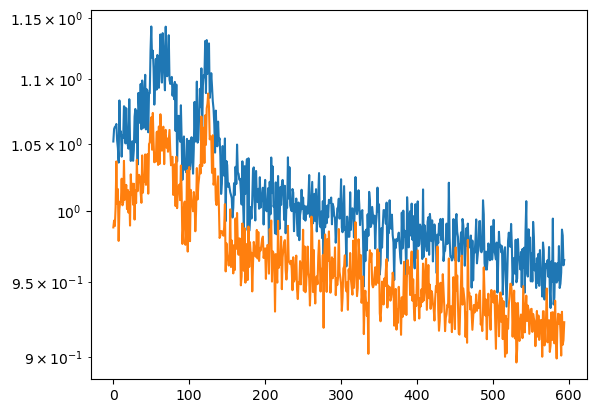

In [19]:
plt.semilogy(on_divided_chunked)
plt.semilogy(off_divided_chunked)

In [20]:
avg_on = np.mean(on_divided_chunked)
avg_off = np.mean(off_divided_chunked)

In [21]:
diff = avg_on - avg_off
diff

0.043735587803481746

In [28]:
gain0 = ((np.sum(off_divided_chunked))/(np.sum(on_divided_chunked - off_divided_chunked)))

In [29]:
gain0

22.0791147456381